# **Introduction: Advanced Explainable AI for computer vision**

Grad-CAM(gradient weighted class activation mapping)


1.   technique used in deep learning model, primarily in computer vision tasks, to visualize and understand which regions of an input image are important for the model's prediction.
2.   the goal of Grad-CAM is to produce a heatmap that highlights the regions in the input image that contribute the most to a specific target class prediction. This is particularly useful when dealing with CNN that are challenging to interpret due to their complexity.
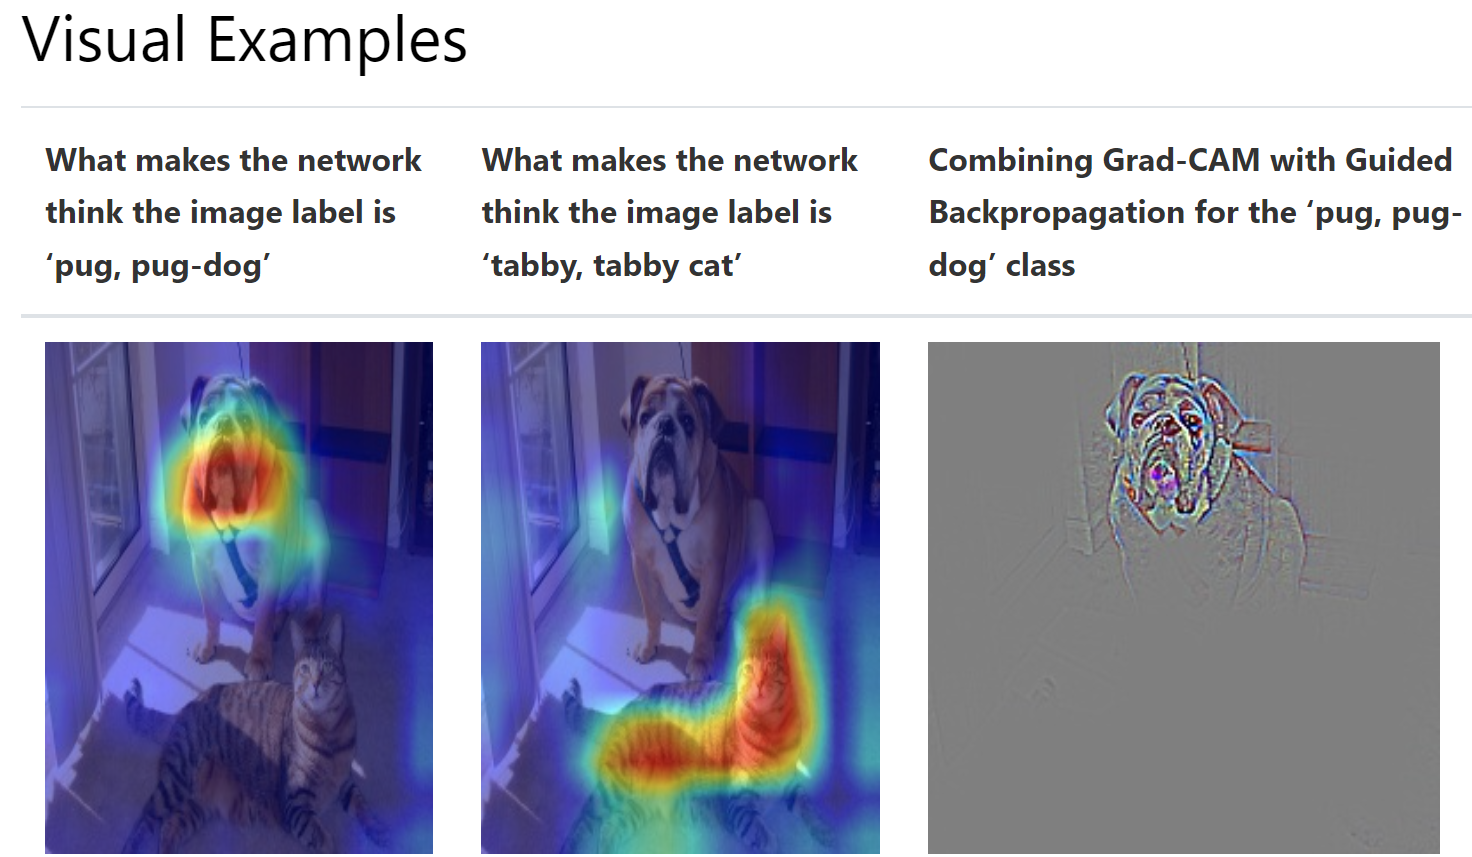





# There are several methods to do the same job

**HiResCAM:**

*Like GradCAM but element-wise multiply the activations with the gradients; provably guaranteed faithfulness for certain models*

**GradCAMElementWise:**
*Like GradCAM but element-wise multiply the activations with the gradients then apply a ReLU operation before summing*

**XGradCAM:**
*Like GradCAM but scale the gradients by the normalized activations*

**AblationCAM**
*Zero out activations and measure how the output drops (this repository includes a fast batched implementation)*

**ScoreCAM**

*Perbutate the image by the scaled activations and measure how the output drops*

**EigenCAM**

*Takes the first principle component of the 2D Activations (no class discrimination, but seems to give great results)*

**EigenGradCAM**

Like EigenCAM but with class discrimination: First principle component of Activations*Grad. Looks like GradCAM, but cleaner *italicized text* *italicized text*

**LayerCAM**

*Spatially weight the activations by positive gradients. Works better especially in lower layers*

# Grad-CAM architecture
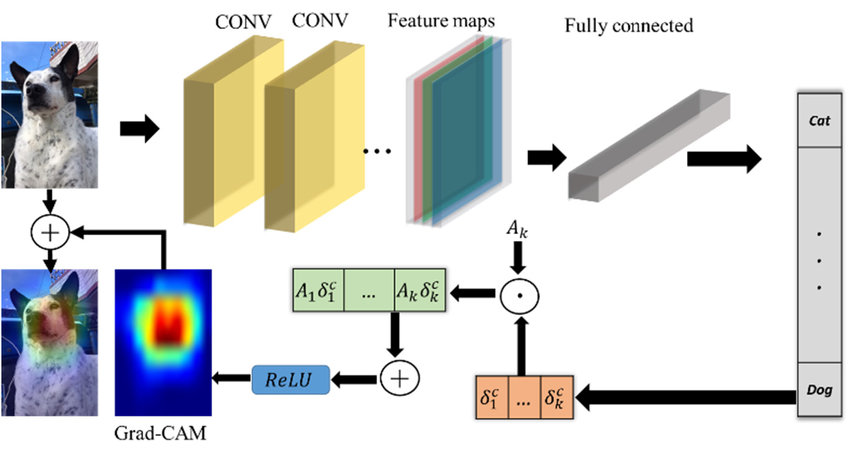

In [1]:
pip install grad-cam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 62.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.4.8-py3-none-any.whl size=38243 sha256=5ee380181ca385601ce9cb1a25f15e77734d940bb8b21879e38c105fc0393e55
  Stored in directory: /root/.cache/pip/wheels/f8/04/36/94ff3c8a4215826a21946b34c01180817e606989fdf53f7cd6
Successfully built grad-cam


In [5]:
import os
import torch
import torch.nn as nn
from torchvision.models import resnet50
from pytorch_grad_cam import GradCAM
#from pytorch_grad_cam import GradCAMPlusPlus
from PIL import Image
from pytorch_grad_cam.utils.image import show_cam_on_image, deprocess_image, preprocess_image
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
from torchvision import transforms
import cv2
import numpy as np
from pytorch_grad_cam import GuidedBackpropReLUModel

def main():
    # Load the pre-trained ResNet50 model
    model = resnet50(pretrained=True)
    target_layers = [model.layer4[-1]]

    # Define a data transformation to resize and normalize the image
    """transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
    ])
"""
    # Load image here or use the sample image (replace this)

    image_path = '/content/dog3.jpg'
    # Replace this with your image path
    ##rgb_img = Image.open(image_path,cv2.IMREAD_GRAYSCALE)


    rgb_img = cv2.imread(image_path, 1)[:, :, ::-1]
    rgb_img = cv2.resize(rgb_img, (500,400))
    #rgb_img = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2GRAY)

    """  pre-processing step for images in deep learning models, and it converts the pixel values of the image from integers (0 to 255)
    to floating-point values in the range [0, 1]. This process is known as normalization.
    Normalization is a standard practice in deep learning because it helps to stabilize and improve the convergence of the training process.
    By scaling the pixel values to a range between 0 and 1, the model's optimization algorithm (e.g., gradient descent)
    can work more effectively, as it prevents excessively large updates to the model's weights."""


    rgb_img= np.float32(rgb_img)/255
    #print(rgb_img)

    # Apply the transformation to the image
    #input_tensor = np.array(rgb_img)
    input_tensor=preprocess_image(rgb_img,
                                    mean=[0.485, 0.456, 0.406],
                                    std=[0.229, 0.224, 0.225])
    #print(input_tensor)
    # Construct the Grad-CAM object
    #cam = GradCAMPlusPlus(model=model, target_layers=target_layers)
    cam = GradCAM(model=model, target_layers=target_layers)


    # We have to specify the target we want to generate the Class Activation Maps for.
    # If targets is None, the highest scoring category will be used for every image in the batch.

    """The imagenet contains 133 different dog classes, and 8351 dog images. The mean of number of
    images for a class is 51.203. The maximum number of images in one class is 70, and the minimum number of images in one class is 41."""
    targets = [ClassifierOutputTarget(162)] #for dog
    #targets = [ClassifierOutputTarget(285)] #for cat

    # Generate CAM
    grayscale_cam = cam(input_tensor=input_tensor, targets=targets)
    grayscale_cam = grayscale_cam[0, :]
    print(grayscale_cam)

    # You can also pass aug_smooth=True and eigen_smooth=True to apply smoothing.
    visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)

    #convert the visualization to a numpy array and save it using cv2
    visualization_np = np.array(visualization)



    # Save the visualization to the output directory
    output_dir = '/content/output'  # Replace this with your desired output directory
    os.makedirs(output_dir, exist_ok=True)
    output_path = os.path.join(output_dir, 'visualization.jpg')
    cv2.imwrite(output_path, cv2.cvtColor(visualization, cv2.COLOR_RGB2BGR ))

if __name__ == "__main__":
   main()


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
import os
import torch
import torch.nn as nn
from torchvision.models import resnet50
#from pytorch_grad_cam import GradCAM
from pytorch_grad_cam import GradCAMPlusPlus
from PIL import Image
from pytorch_grad_cam.utils.image import show_cam_on_image, deprocess_image, preprocess_image
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
from torchvision import transforms
import cv2
import numpy as np
from pytorch_grad_cam import GuidedBackpropReLUModel


# Load the pre-trained ResNet50 model
model = resnet50(pretrained=True)
target_layers = [model.layer4[-1]]

# Define a data transformation to resize and normalize the image
"""transform = transforms.Compose([
transforms.Resize((224, 224)),
transforms.ToTensor(),
transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])
"""
# Load image here or use the sample image (replace this)

image_path = 'dog.jpg'
# Replace this with your image path
##rgb_img = Image.open(image_path,cv2.IMREAD_GRAYSCALE)
rgb_img = cv2.imread(image_path, 1)[:, :, ::-1]
#rgb_img = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2GRAY)
rgb_img= np.float32(rgb_img)/255
print(rgb_img)

# Apply the transformation to the image
#input_tensor = np.array(rgb_img)
input_tensor=preprocess_image(rgb_img,
                            mean=[0.485, 0.456, 0.406],
                            std=[0.229, 0.224, 0.225])

# Construct the Grad-CAM object
cam = GradCAMPlusPlus(model=model, target_layers=target_layers)

# We have to specify the target we want to generate the Class Activation Maps for.
# If targets is None, the highest scoring category will be used for every image in the batch.
"""The imagenet contains 133 different dog classes, and 8351 dog images. The mean of number of
images for a class is 51.203. The maximum number of images in one class is 70, and the minimum number of images in one class is 41."""
targets = [ClassifierOutputTarget(166)]

# Generate CAM
grayscale_cam = cam(input_tensor=input_tensor, targets=targets)
grayscale_cam = grayscale_cam[0, :]
# You can also pass aug_smooth=True and eigen_smooth=True to apply smoothing.
visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)

#convert the visualization to a numpy array and save it using cv2
visualization_np = np.array(visualization)


# Save the visualization to the output directory
output_dir = '/content/output'  # Replace this with your desired output directory
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, 'visualization.jpg')
cv2.imwrite(output_path, cv2.cvtColor(visualization, cv2.COLOR_RGB2BGR ))


[[[0.         0.00784314 0.        ]
  [0.         0.00392157 0.        ]
  [0.         0.00392157 0.        ]
  ...
  [0.00392157 0.07058824 0.        ]
  [0.00392157 0.07058824 0.        ]
  [0.04313726 0.10980392 0.03529412]]

 [[0.00392157 0.01176471 0.        ]
  [0.         0.00784314 0.        ]
  [0.         0.00392157 0.        ]
  ...
  [0.01960784 0.08627451 0.01176471]
  [0.02352941 0.09019608 0.01960784]
  [0.06666667 0.13333334 0.05882353]]

 [[0.01176471 0.01960784 0.00784314]
  [0.00784314 0.01568628 0.00392157]
  [0.00392157 0.01176471 0.        ]
  ...
  [0.04705882 0.10196079 0.03529412]
  [0.05882353 0.11372549 0.05490196]
  [0.10588235 0.16078432 0.09411765]]

 ...

 [[0.57254905 0.46666667 0.42352942]
  [0.57254905 0.46666667 0.42352942]
  [0.5764706  0.47058824 0.42745098]
  ...
  [0.5647059  0.4862745  0.44313726]
  [0.5647059  0.4862745  0.44313726]
  [0.5647059  0.4862745  0.44313726]]

 [[0.5686275  0.4627451  0.41960785]
  [0.57254905 0.46666667 0.42352942]


True

# **resnet50**

# the general idea of the model is that when training deep neural network the accuracy should always go down as we increase the depth of the network.
# however, in practice it becomes worst after some layers which resnets architecture aimed to solve.

In [ ]:
!pip install validators matplotlib

  Preparing metadata (setup.py) ... done
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19580 sha256=34cae19c541539e7ab8aaa9d670de59a9fbd43bba876de4e478fd8dd9e6bbd2a
  Stored in directory: /root/.cache/pip/wheels/f2/ed/dd/d3a556ad245ef9dc570c6bcd2f22886d17b0b408dd3bbb9ac3
Successfully built validators


In [ ]:
import torch
from PIL import Image
import torchvision.transforms as transforms
import numpy as np
import json
import requests
import matplotlib.pyplot as plt


device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f'Using {device} for inference')

Using cuda for inference


In [ ]:
resnet50 = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_resnet50', pretrained=True)
utils = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_convnets_processing_utils')

resnet50.eval().to(device)

Using cache found in /root/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub
Using cache found in /root/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layers): Sequential(
    (0): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d

Downloading: "https://github.com/pytorch/vision/zipball/main" to /root/.cache/torch/hub/main.zip


sample 0: [('Walker hound, Walker foxhound', '1.1%'), ('American Staffordshire terrier, Staffordshire terrier, American pit bull terrier, pit bull terrier', '1.1%'), ('Staffordshire bullterrier, Staffordshire bull terrier', '0.8%'), ('English foxhound', '0.5%'), ('Chihuahua', '0.5%')]
[[('Walker hound, Walker foxhound', '1.1%'), ('American Staffordshire terrier, Staffordshire terrier, American pit bull terrier, pit bull terrier', '1.1%'), ('Staffordshire bullterrier, Staffordshire bull terrier', '0.8%'), ('English foxhound', '0.5%'), ('Chihuahua', '0.5%')]]


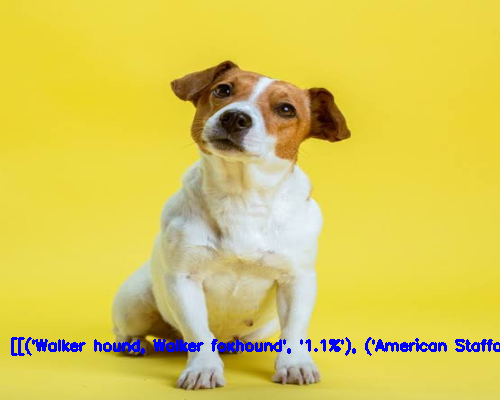

In [ ]:
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

image_path = "/content/dog.JPG"

rgb_img = cv2.imread(image_path, 1)[:, :, ::-1]
rgb_img= np.float32(rgb_img)/255
image_tensor = torch.tensor(rgb_img).permute(2,0,1).unsqueeze(0)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = torch.hub.load('pytorch/vision','resnet50', pretrained= True)
model = model.to(device)

image_tensor = image_tensor.to(device)
with torch.no_grad():
    output= torch.nn.functional.softmax(resnet50(image_tensor), dim=1)
result= utils.pick_n_best(predictions=output, n=5)
print(result)

img = cv2.imread(image_path)
#image = img.resize()
img = cv2.resize(img, (500,400))
cv2.putText(img, str(result), (10,350), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color = (255,0,0), thickness=2)
cv2_imshow(img)
